# Definition
**Kernel Density Estimation (KDE)** is indeed a powerful non-parametric method for estimating the probability density function of a random variable. The choice of bandwidth is crucial as it determines the smoothness of the resulting density estimate.


*Bandwidth (bw)*: This parameter controls the width of the kernel function. A smaller bandwidth can lead to an overly noisy estimate, while a larger bandwidth can oversmooth the data, losing important details.


*Kernel Function (K)*: Common choices include Gaussian, Epanechnikov, and uniform kernels. The Gaussian kernel is popular due to its smooth shape and ease of computation.


The formula for **KDE** is:

$$\widehat{f}(x) = \frac{1}{n \cdot \mathrm{bw}} \sum_{i=1}^n K\left(\frac{x - x_i}{\mathrm{bw}}\right)$$

$$n$$, is the humberr of data points,
$$x_i$$, aree the data points
$$K$$, the kernel function


In [1]:
# import libraries
from scipy import stats
from scipy import optimize
from scipy.stats import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt
    
import seaborn as sns
sns.set(style="whitegrid")

## For example, 

consider a set of samples, X_samples, drawn from a random variable X with unknown distribution (here simulated using the χ2 distribution with five degrees of freedom):

In [2]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)
kde = gaussian_kde(X_samples)

If we wish, we could also specify a function for computing the bandwidth, or directly setting the bandwidth, using the bw_method argument. To set a smaller bandwidth, we can, for example, use

In [3]:
kde_low_bw = gaussian_kde(X_samples, bw_method=0.25)

The gaussian_kde function returns an estimate of the distribution function, which we, for example, can graph or use for other applications. Here we plot a histogram of the data and the two kernel-density estimates (with default and explicitly set bandwidth). 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

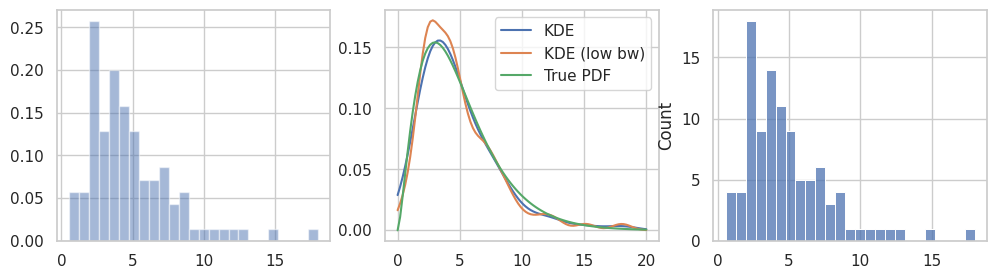

In [4]:
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, density=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()

sns.histplot(X_samples, bins=25, ax=axes[2])

*Histogram (left), kernel-density estimation of the distribution function (middle), and both a histogram and the kernel-density estimate in the same graph (right)*

Given kernel-density estimate, we can also use it to generate new random numbers using the resample method, which takes the number of data points as arguments:

In [5]:
kde.resample(10)

array([[-0.3092792 ,  2.10845943,  8.80879154,  7.00143307, 10.549791  ,
         4.26666274,  3.03830592,  8.64765332,  6.31969839,  5.84346524]])

The kernel-density estimate object does not directly contain methods for computing the cumulative distribution functions (CDF) and its inverse, the percent-point function (PPF). But there are several methods for integrating the kernel-density estimate of the probability distribution function. For example, for a one-dimensional KDE, we can use the integrate_box_1d to obtain the corresponding CDF:

In [6]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)

In [7]:
def _kde_ppf(q):
     return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]
                    
kde_ppf = np.vectorize(_kde_ppf)

and can use the SciPy optimize.fsolve function to find the inverse (the PPF):

In [8]:
kde_ppf([0.05, 0.95])

array([ 0.68580861, 11.08586092])

As illustrated with this example, once we have a KDE that represents the probability distribution for a statistical problem, we can proceed with many of the same methods as we use in parametric statistics. The advantage of nonparametric methods is that we do not necessarily need to make assumptions about the shape of the distribution function. However, because nonparametric methods use less information (weaker assumptions) than parametric methods, their statistical power is lower. Therefore, if we can justify using a parametric method, then that is usually the best approach. Nonparametric methods offer a versatile generic approach that we can fall back on when parametric methods are not feasible.